In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [53]:
# load data
file_path = "./games_of_all_time.csv"

df = pd.read_csv(file_path,sep=",")

# transform str-like lists into real lists
df['platform'] = df['platform'].str.strip("][").str.replace("'",'').str.split(', ')
df['genre'] = df['genre'].str.strip("][").str.replace("'",'').str.split(', ')

df.head()

,name,date,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,"Nov 23, 1998",99.0,91.0,[nintendo-64],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"[Action Adventure, Fantasy]",singleplayer,E
1,NFL 2K1,"Sep 7, 2000",97.0,62.0,[dreamcast],"In the end, NFL 2K1 is a deeper, more refined ...",https://www.metacritic.com/game/dreamcast/nfl-2k1,Visual Concepts,"[Sports, Traditional, Football, Sim]",NaN,E
2,The House in Fata Morgana - Dreams of the Reve...,"Apr 9, 2021",97.0,83.0,[switch],A gothic suspense tale set in a cursed mansion...,https://www.metacritic.com/game/switch/the-hou...,HuneX,"[Adventure, Visual Novel]",singleplayer,M
3,Super Mario Odyssey,"Oct 27, 2017",97.0,89.0,[switch],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"[Action, Platformer, 3D]",singleplayer,E10+
4,Super Mario Galaxy 2,"May 23, 2010",97.0,91.0,[wii],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"[Action, Platformer, 3D]",singleplayer,E


In [100]:
# statistical analysis of each column
game_num = len(df['game_name'].unique())
print(f'There are {game_num} different games in total')

There are 8831 different games in total


### Overall Score distributions

In [120]:
print('statistical information for meta_score and user_score:')
pd.set_option('float_format', '{:.2f}'.format)
df.describe()

statistical information for meta_score and user_score:


,meta_score,user_score,year
count,8308.00,8308.00,8308.00
mean,71.42,70.16,2011.04
std,12.02,13.14,6.30
min,11.00,2.00,1995.00
25%,63.50,63.50,2006.00
50%,74.00,73.00,2011.00
75%,80.00,79.30,2017.00
max,99.00,98.00,2022.00


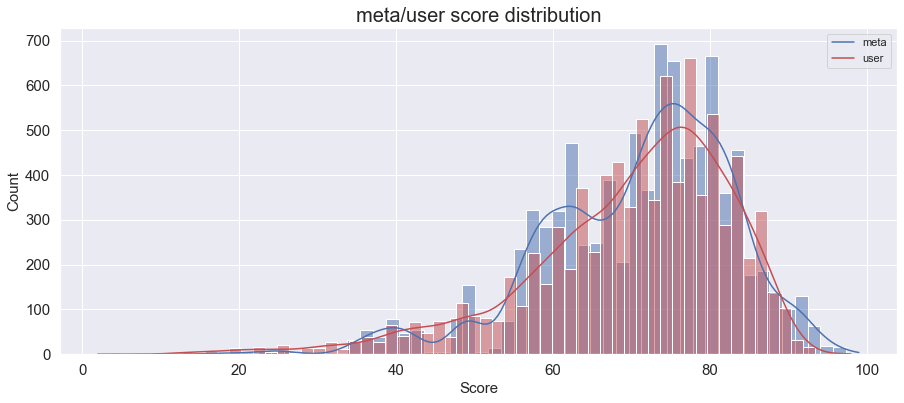

In [206]:
# label distribution
plt.figure(figsize=(15,6))
sns.histplot(data=df, x='meta_score', kde=True)
sns.histplot(data=df, x='user_score', kde=True, color='r')

plt.title('meta/user score distribution', fontsize=20)
plt.legend(['meta','user'])
plt.xlabel('Score', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

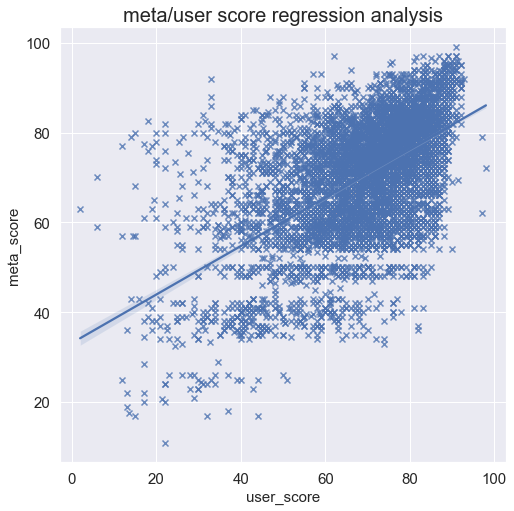

In [67]:
# label distribution
plt.figure(figsize=(8,8))
sns.regplot(data=df, x='user_score', y='meta_score', marker="x")

plt.title('meta/user score regression analysis', fontsize=20)
plt.xlabel('user_score', fontsize=15)
plt.ylabel('meta_score', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [62]:
import statsmodels.formula.api as smf
import numpy as np

mod = smf.ols(formula='meta_score ~ user_score', data=df)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:             meta_score   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     4555.
Date:                Fri, 01 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:01:24   Log-Likelihood:                -32770.
No. Observations:                8831   AIC:                         6.554e+04
Df Residuals:                    8829   BIC:                         6.556e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.1310      0.569     58.217      0.0

# Platform Analysis

In [5]:
platform_df = df.explode('platform').reset_index()
platform_df.head()

,index,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,0,The Legend of Zelda: Ocarina of Time,99.0,91.0,nintendo-64,"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"[Action Adventure, Fantasy]",singleplayer,E
1,1,Super Mario Galaxy,97.0,91.0,wii,[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"[Action, Platformer, 3D]",singleplayer,E
2,2,Super Mario Galaxy 2,97.0,91.0,wii,"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"[Action, Platformer, 3D]",singleplayer,E
3,3,Metroid Prime,97.0,89.0,gamecube,Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"[Action, Shooter, First-Person, Sci-Fi]",singleplayer,T
4,4,Super Mario Odyssey,97.0,89.0,switch,New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"[Action, Platformer, 3D]",singleplayer,E10+


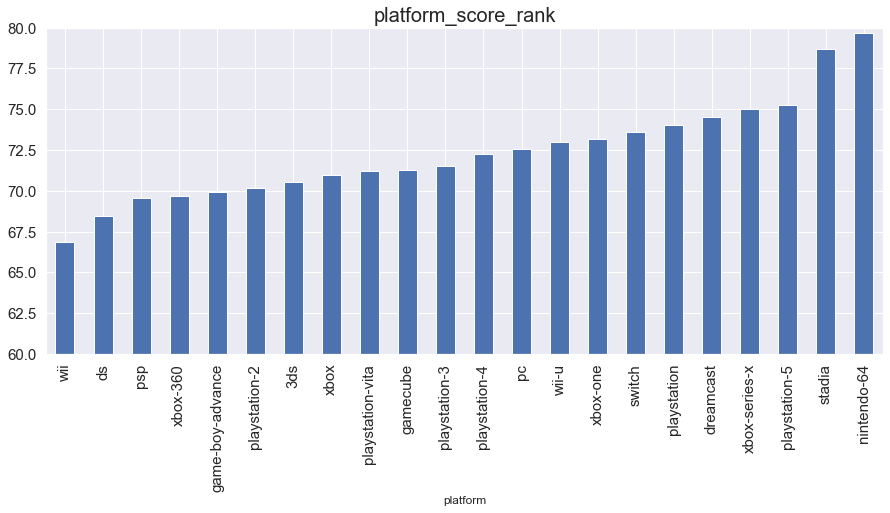

In [28]:
plt.figure(figsize=(15,6))

platform_df.groupby(['platform'])['meta_score'].mean().sort_values().plot.bar()
plt.title('platform_score_rank', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([60,80])
plt.show()

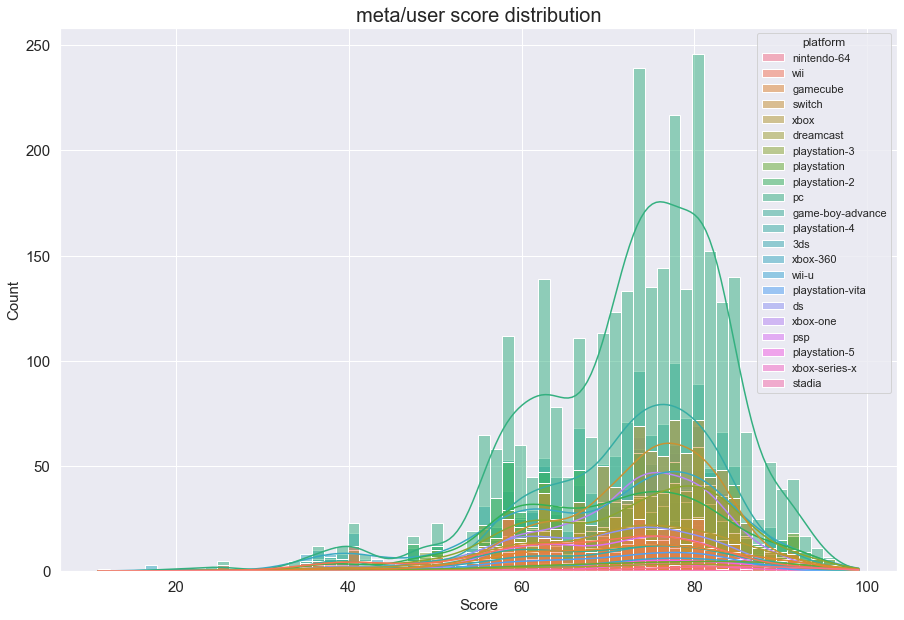

In [207]:
# platform score distribution
plt.figure(figsize=(15,10))
sns.histplot(data=platform_df, x='meta_score', kde=True, hue='platform')

plt.title('meta/user score distribution', fontsize=20)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.yscale('log')
plt.show()

# Genre Analysis

In [164]:
genre_df = df.explode('genre').reset_index()
genre_df.head()

,index,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,0,The Legend of Zelda: Ocarina of Time,99.0,91.0,[nintendo-64],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,Action Adventure,singleplayer,E
1,0,The Legend of Zelda: Ocarina of Time,99.0,91.0,[nintendo-64],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,Fantasy,singleplayer,E
2,1,Super Mario Galaxy,97.0,91.0,[wii],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,Action,singleplayer,E
3,1,Super Mario Galaxy,97.0,91.0,[wii],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,Platformer,singleplayer,E
4,1,Super Mario Galaxy,97.0,91.0,[wii],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,3D,singleplayer,E


In [182]:
genre_count = genre_df.groupby('genre').count()['index'].reset_index().rename(columns={'index':'count'})
genre_count = genre_count.sort_values('count', ascending=False)[:10]
genre_count.head()

,genre,count
5,Action,3125
56,General,2488
6,Action Adventure,1208
117,Shooter,1101
111,Role-Playing,1059


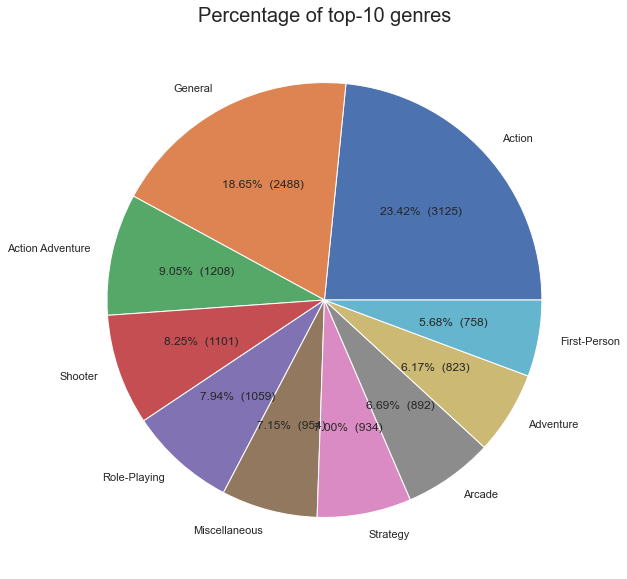

In [208]:
# platform score distribution
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(15,10))
data_num = len(genre_df)
plt.pie(x=genre_count['count'], labels=genre_count['genre'], shadow=False, autopct=make_autopct(genre_count['count']))

plt.title('Percentage of top-10 genres', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.yscale('log')
plt.show()

# Type Analysis

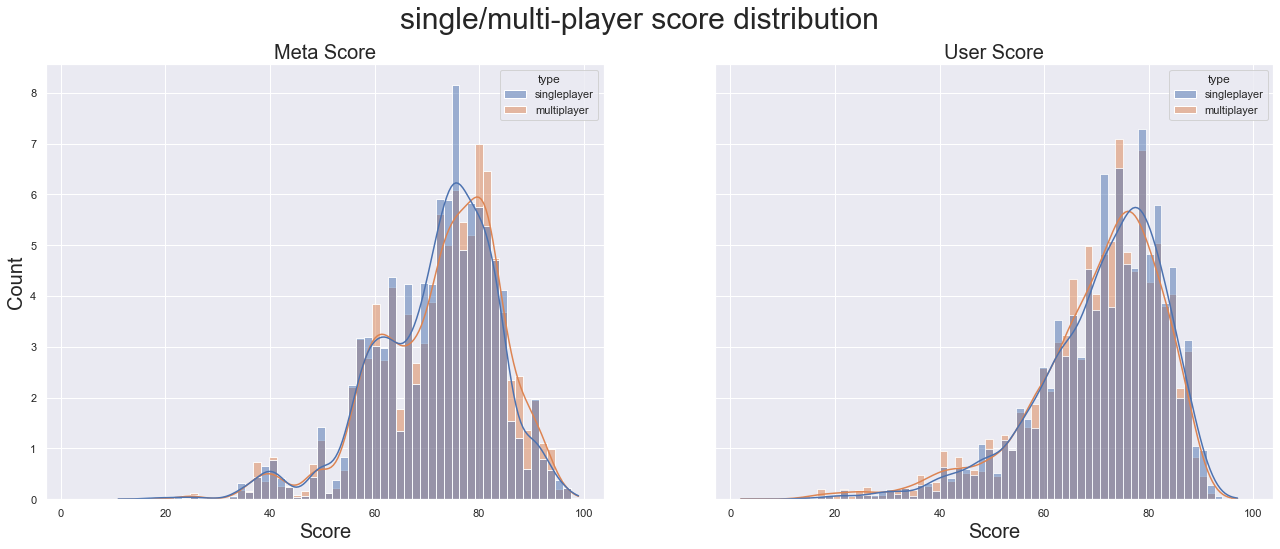

In [118]:
# platform score distribution
fig, axes = plt.subplots(1, 2, figsize=(22,8), sharex=True, sharey=True)
sns.histplot(data=platform_df, x='meta_score', kde=True, hue='type', stat='percent', common_norm=False, ax=axes[0])
sns.histplot(data=platform_df, x='user_score', kde=True, hue='type', stat='percent', common_norm=False, ax=axes[1])
fig.suptitle('single/multi-player score distribution', fontsize=30)
axes[0].set_xlabel('Score', fontsize=20)
axes[0].set_title('Meta Score', fontsize=20)
axes[1].set_title('User Score', fontsize=20)
axes[1].set_xlabel('Score', fontsize=20)
axes[0].set_ylabel('Count', fontsize=20)
# plt.yscale('log')
plt.show()

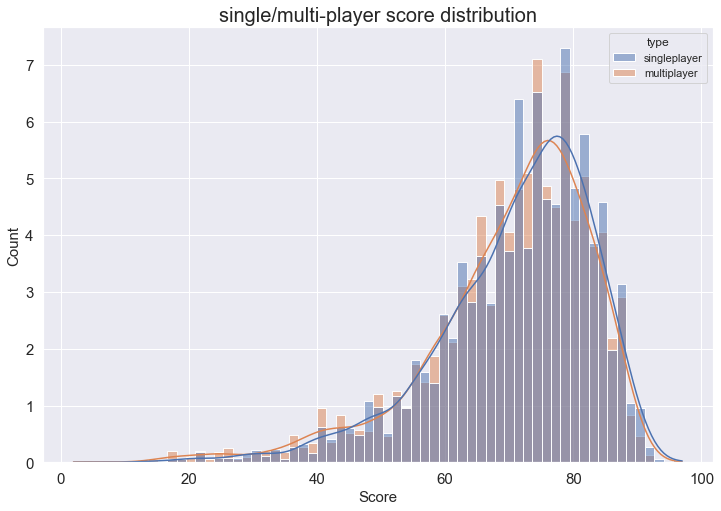

In [6]:
# platform score distribution
plt.figure(figsize=(12,8))
sns.histplot(data=platform_df, x='user_score', kde=True, hue='type', stat='percent', common_norm=False)

plt.title('single/multi-player score distribution', fontsize=20)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.yscale('log')
plt.show()

## Date related analysis

In [60]:
# process date data

df = df.drop(df[(df['date'] == 'TBA') | df['date'].isna()].index)
df['year'] = pd.to_datetime(df['date']).dt.year
df.head()

,name,date,meta_score,user_score,platform,description,url,developer,genre,type,rating,year
0,The Legend of Zelda: Ocarina of Time,"Nov 23, 1998",99.0,91.0,[nintendo-64],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"[Action Adventure, Fantasy]",singleplayer,E,1998
1,NFL 2K1,"Sep 7, 2000",97.0,62.0,[dreamcast],"In the end, NFL 2K1 is a deeper, more refined ...",https://www.metacritic.com/game/dreamcast/nfl-2k1,Visual Concepts,"[Sports, Traditional, Football, Sim]",NaN,E,2000
2,The House in Fata Morgana - Dreams of the Reve...,"Apr 9, 2021",97.0,83.0,[switch],A gothic suspense tale set in a cursed mansion...,https://www.metacritic.com/game/switch/the-hou...,HuneX,"[Adventure, Visual Novel]",singleplayer,M,2021
3,Super Mario Odyssey,"Oct 27, 2017",97.0,89.0,[switch],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"[Action, Platformer, 3D]",singleplayer,E10+,2017
4,Super Mario Galaxy 2,"May 23, 2010",97.0,91.0,[wii],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"[Action, Platformer, 3D]",singleplayer,E,2010


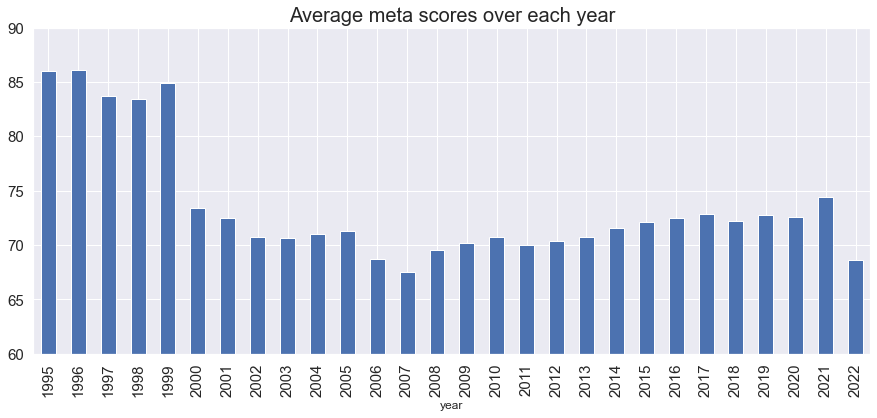

In [72]:
plt.figure(figsize=(15,6))

df.groupby(['year'])['meta_score'].mean().sort_index().plot.bar()
plt.title('Average meta scores over each year', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.ylim([60,90])
plt.show()

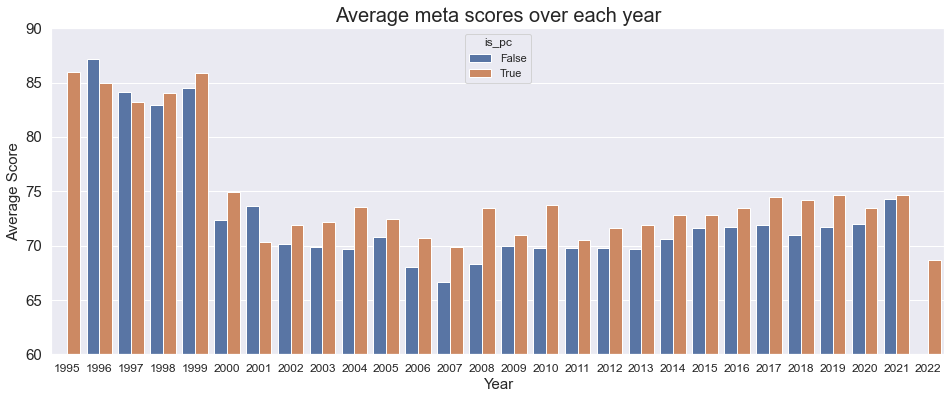

In [103]:
plt.figure(figsize=(16,6))

sns.barplot(data=df.groupby(['year', 'is_pc'])[['meta_score']].mean().sort_index().reset_index(), x='year', y='meta_score', hue='is_pc')

plt.title('Average meta scores over each year', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
# plt.legend(['PC', 'Game Station'],fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Score', fontsize=15)
plt.ylim([60,90])
plt.show()

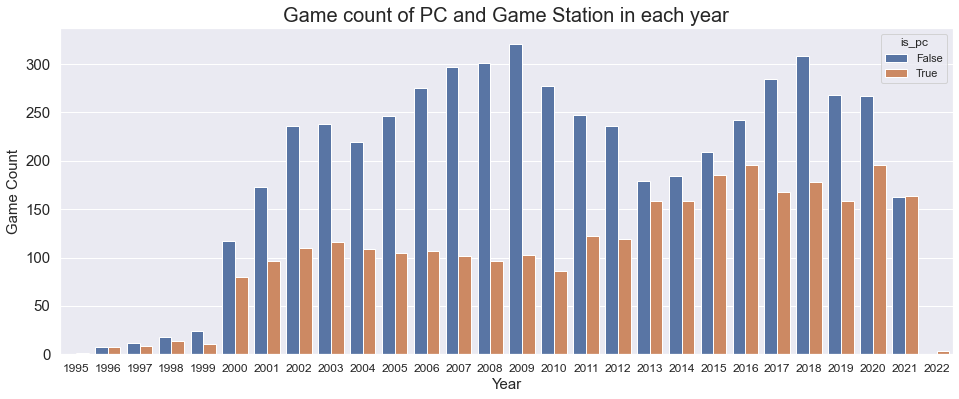

In [111]:
plt.figure(figsize=(16,6))

sns.barplot(data=df.groupby(['year', 'is_pc'])[['meta_score']].count().sort_index().reset_index(), x='year', y='meta_score', hue='is_pc')

plt.title('Game count of PC and Game Station in each year', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
# plt.legend(['PC', 'Game Station'],fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Game Count', fontsize=15)
plt.show()